In [1]:
import matplotlib.pyplot as plt

import sim.viz
import sim.petrinet_replay
import sim.sim_tests
import sim.log_similarity
import sim.manual_modeling as mm
from sim.model_configuration import ResourceConfig, ActivityConfig, ArrivalProcessConfig
from sim.simulation import simulate, create_simulation_model
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Arrivals:
default: ArrivalProcessConfig(first_arrival=2021-04-17 13:15:00+02:00, inter_arrivals=DistSampler(expon({'scale': 30}) m), business_hours=WorkweekBusinessHours({<Weekdays.Monday: 0>: (datetime.time(9, 0), datetime.time(17, 0)), <Weekdays.Tuesday: 1>: (datetime.time(9, 0), datetime.time(17, 0)), <Weekdays.Wednesday: 2>: (datetime.time(9, 0), datetime.time(17, 0)), <Weekdays.Thursday: 3>: (datetime.time(9, 0), datetime.time(17, 0)), <Weekdays.Friday: 4>: (datetime.time(9, 0), datetime.time(17, 0))}))
Activities:
a: ActivityConfig(queueing_discipline=Fifo, processing_time_sampler=StaticSampler(0:30:00), business_hours=AlwaysInBusiness)
b: ActivityConfig(queueing_discipline=Fifo, processing_time_sampler=StaticSampler(0:30:00), business_hours=AlwaysInBusiness)
Resources:
r: ResourceConfig(capacity=1, business_hours=AlwaysInBusiness, performance=ConstantPeakPerformance)
Decision Points: n/a
MappingConfig(assignable_resources={'a': {'r'}, 'b': {'r'}}, propensities={'a': {'r': 2}, 'b

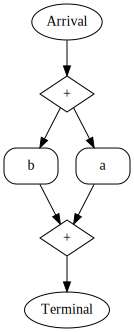

In [2]:
graph, config = sim.sim_tests.par()

print(config)
gg = sim.viz.visualize_sim_graph(graph, label_decision_points=True)
sim.viz.save_horizontal(gg, 'par_net')
gg

In [3]:
model = create_simulation_model(graph, config)
simulation = simulate(model)

In [4]:
log = simulation.get_log()

In [5]:
log

[{'attributes': {'concept:name': 'default_case_0'}, 'events': [{'concept:name': 'b', 'time:timestamp': Timestamp('2021-04-19 09:00:00+0200', tz='Mitteleuropäische Sommerzeit'), 'org:resource': 'n/a', 'lifecycle:transition': 'schedule'}, '..', {'concept:name': 'a', 'time:timestamp': Timestamp('2021-04-19 10:00:00+0200', tz='Mitteleuropäische Sommerzeit'), 'org:resource': 'r', 'lifecycle:transition': 'complete'}]}, '....', {'attributes': {'concept:name': 'default_case_999'}, 'events': [{'concept:name': 'a', 'time:timestamp': Timestamp('2021-05-09 06:46:00+0200', tz='Mitteleuropäische Sommerzeit'), 'org:resource': 'n/a', 'lifecycle:transition': 'schedule'}, '..', {'concept:name': 'b', 'time:timestamp': Timestamp('2021-05-31 01:00:00+0200', tz='Mitteleuropäische Sommerzeit'), 'org:resource': 'r', 'lifecycle:transition': 'complete'}]}]

In [6]:
len(log)

1000

In [7]:
from collections import Counter

counts = Counter()
for t in log:
    for a, r in [(e['concept:name'], e['org:resource']) for e in t if e['lifecycle:transition'] == 'start']:
        counts[(a,r)] += 1
        break

print(counts)

Counter({('a', 'r'): 999, ('b', 'r'): 1})
